In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('layer/prog.nc').mean(['yh','yq'])
ds

<xarray.Dataset>
Dimensions:  (xq: 81, zl: 40, Time: 12, xh: 80, zi: 41)
Coordinates:
  * xq       (xq) float64 0.0 10.0 20.0 30.0 40.0 ... 770.0 780.0 790.0 800.0
  * zl       (zl) float64 1.035e+03 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
  * Time     (Time) object 0001-01-01 01:00:00 ... 0001-01-01 12:00:00
  * xh       (xh) float64 5.0 15.0 25.0 35.0 45.0 ... 765.0 775.0 785.0 795.0
  * zi       (zi) float64 1.035e+03 1.035e+03 1.035e+03 ... 1.036e+03 1.036e+03
Data variables:
    u        (Time, zl, xq) float32 nan 0.02345 0.03627 ... 1.958e-05 nan
    v        (Time, zl, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    h        (Time, zl, xh) float64 1e-10 1e-10 1e-10 ... 100.0 100.0 100.0
    e        (Time, zi, xh) float32 -4.376 -3.228 -2.34 ... -4e+03 -4e+03 -4e+03
    temp     (Time, zl, xh) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    salt     (Time, zl, xh) float32 34.0 34.0 34.0 34.0 ... 35.0 35.0 35.0 35.0
    rhopot0  (Time, zl, xh) float32 1.034e+03 1.034e+03 ... 1.035e+03 1.035e+03

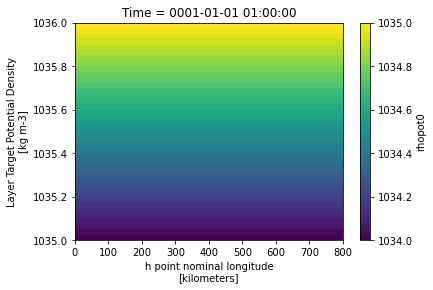

In [3]:
ds['rhopot0'].isel(Time=0).plot()